# Overview

## Case Study
- Goal: analyze customer survey data to uncover insights about their preferences and behaviors to make informed business decisions.

    - 1) **Understanding Price Sensitivity**: How do different age groups perceive the importance of energy prices?

    - 2) **Evaluating Environmental Concerns**: Are customers with varying income levels differently concerned about the environmental impact of their energy providers?

    - 3) **Assessing Service Reliability**: Does household size influence the perceived importance of reliable energy service?

    - 4) **Customer Support Satisfaction**: How does education level affect satisfaction with customer support?

    - 5) **Perception of Company Reputation**: Do customer locations affect their perception of the energy company's reputation?



##Statistical Test
[1] **ANOVA (Analysis of Variance)**
- Answers the question of ***whether there are significant differences between the means of three or more groups***.


[2] **Tukey's HSD (Honestly Significant Difference) Test**
- A post-hoc test used after ANOVA to identify ***which specific pairs of group means are significantly different*** from each other.

## Step0: Set Up (Import Libraries)

In [28]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, levene, chi2_contingency, f_oneway
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy.stats import ttest_ind
from statsmodels.stats.diagnostic import lilliefors

import warnings
warnings.simplefilter("ignore")

## Step1: Load Data

**Data Description**

The dataset contains responses from ***100 households***, focusing on their energy consumption and preferences. Key columns include demographic information and survey responses to different themes (Price Sensitivity, Environmental Impact, etc.).


- **ID**: Unique identifier for each respondent

- **Gender**: Respondent's gender (1 = Male, 2 = Female)

- **AgeCategory**: Age group of the respondent
    
    (1 = 15-20, 2 = 21-30, 3 = 31-40, 4 = 41-50, 5 >= 50)

- **Education**: Level of education

    (1 = Primary, 2 = Secondary, 3 = Bachelor’s, 4 = Master’s and above)

- **HouseholdSize**: Number of people in the household

- **Regions**: Geographic location
    (1-12 districts)

- **Income**: Monthly Income (THB)

    (1 = (0 - 10,000), 2 = (10,001 - 20,000), 3 = (20,001 - 30,000), 4 = (30,001 - 40,000), 5 = (40,001 - 50,000), 6 = (>= 50,000))

- **Energy Bills**: Monthly expenditure on energy bills (THB)

- **Q1 to Q25**: Responses to survey questions on a scale of 1-5, covering different themes including price sensitivity, environmental impact, service reliability, customer support, and company reputation

- **Con_Usage**: Likelihood of continuing with the current energy provider

    (1 = Very Unlikely, 2 = Unlikely, 3 = Neutral, 4 = Likely, 5 = Very Likely)

- **Recommend**: Likelihood of recommending the current energy provider to others

    (1 = Very Unlikely, 2 = Unlikely, 3 = Neutral, 4 = Likely, 5 = Very Likely)

In [2]:
# Load Dataset

file_path = 'https://raw.githubusercontent.com/PPWorkSpace1/Anova/main/SurveyData.csv'

df = pd.read_csv(file_path)

## Step2: Data Exploration & Pre-processing




### 2.1 Preview Data

In [3]:
# Display first 10 rows of dataset

df.head(10)

,ID,Gender,AgeCategory,Education,HouseholdSize,Regions,Income,Energy Bills,Q1,Q2,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Con_Usage,Recommend
0,1,1,4,1,4.0,1,1,4992.0,5.0,4.0,...,3.0,4,4.0,5.0,3.5,0.5,3.0,4.0,4.0,3.5
1,2,2,4,1,3.0,5,1,1198.0,3.5,4.0,...,4.0,4,4.0,3.0,3.0,4.5,4.0,4.0,3.0,4.0
2,3,1,4,3,2.0,5,1,895.0,5.0,4.0,...,3.0,3,3.5,3.0,3.0,0.5,4.0,3.5,4.0,3.5
3,4,1,1,2,3.0,7,1,4671.0,5.0,5.0,...,3.0,4,4.5,3.0,3.5,5.0,2.0,3.5,5.0,2.5
4,5,1,4,2,3.0,9,2,4860.0,3.5,4.0,...,3.0,4,3.5,4.0,3.5,4.5,4.0,3.5,3.5,4.0
5,6,2,4,4,4.0,5,6,3002.0,4.0,4.0,...,3.0,5,4.0,2.5,4.0,4.0,4.0,4.0,3.5,3.0
6,7,1,4,5,4.0,1,1,2319.0,3.5,5.0,...,4.0,4,4.0,3.0,2.0,5.0,4.0,4.0,3.0,4.0
7,8,1,4,5,1.0,1,1,1217.0,3.5,4.0,...,4.0,4,4.0,3.0,3.5,2.5,4.0,3.5,3.5,4.0
8,9,1,4,1,1.0,1,3,3282.0,5.0,4.0,...,4.0,4,4.0,5.0,3.0,4.0,4.0,3.0,3.5,4.0
9,10,2,1,1,2.0,8,2,4077.0,4.0,4.0,...,4.0,5,3.0,2.0,4.0,4.0,2.0,4.0,4.0,1.0


### 2.2 Check for Missing Values

In [4]:
# Check for missing values

missing_values = df.isnull().sum()
missing_values

ID                 0
Gender             0
AgeCategory        0
Education          0
HouseholdSize    400
Regions            0
Income             0
Energy Bills     400
Q1                 0
Q2                 0
Q3                 0
Q4                 0
Q5                 0
Q6                 0
Q7                 0
Q8                 0
Q9                 0
Q10                0
Q11                0
Q12                0
Q13                0
Q14                0
Q15                0
Q16                0
Q17                0
Q18                0
Q19                0
Q20                0
Q21                0
Q22                0
Q23                0
Q24                0
Q25                0
Con_Usage          0
Recommend          0
dtype: int64

### 2.3 Check & Format Data Types

[1] Format Date

In [5]:
# Check & Format Data Types: Categorical Variables

# List of columns to convert to 'category' type
categorical_columns = ['Gender', 'AgeCategory', 'Education', 'HouseholdSize', 'Regions', 'Income']

# Convert columns to 'category'
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Check data types
df.dtypes

ID                  int64
Gender           category
AgeCategory      category
Education        category
HouseholdSize    category
Regions          category
Income           category
Energy Bills      float64
Q1                float64
Q2                float64
Q3                float64
Q4                float64
Q5                float64
Q6                float64
Q7                float64
Q8                float64
Q9                float64
Q10               float64
Q11               float64
Q12               float64
Q13               float64
Q14               float64
Q15               float64
Q16               float64
Q17               float64
Q18               float64
Q19                 int64
Q20               float64
Q21               float64
Q22               float64
Q23               float64
Q24               float64
Q25               float64
Con_Usage         float64
Recommend         float64
dtype: object

[2] Categorize Energy Bills into 4 Groups

In [6]:
# Categorize 'Energy Bills'
df['EnergyBill_Cat'] = pd.qcut(df['Energy Bills'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Convert to categorical type
df['EnergyBill_Cat'] = df['EnergyBill_Cat'].astype('category')


### 2.4 Visualize data & Summary Statistics

#### 2.4.1 Univariate Analysis





[1] Categorical Variables

In [7]:
# Categorical Variables: Summary Stat

categorical_vars = ['Gender',
                    'AgeCategory',
                    'Education',
                    'HouseholdSize',
                    'Regions',
                    'Income']

for var in categorical_vars:
    print(f'Proportion of {var}:')
    print(df[var].value_counts(normalize=True).sort_index())
    print('\n')


Proportion of Gender:
Gender
1    0.44
2    0.56
Name: proportion, dtype: float64


Proportion of AgeCategory:
AgeCategory
1    0.142
2    0.076
3    0.164
4    0.418
5    0.200
Name: proportion, dtype: float64


Proportion of Education:
Education
1    0.284
2    0.124
3    0.108
4    0.104
5    0.188
6    0.090
7    0.102
Name: proportion, dtype: float64


Proportion of HouseholdSize:
HouseholdSize
1.0    0.27
2.0    0.10
3.0    0.23
4.0    0.24
5.0    0.16
Name: proportion, dtype: float64


Proportion of Regions:
Regions
1     0.042
2     0.070
3     0.064
4     0.022
5     0.092
6     0.008
7     0.306
8     0.246
9     0.104
10    0.006
11    0.020
12    0.020
Name: proportion, dtype: float64


Proportion of Income:
Income
1    0.294
2    0.166
3    0.092
4    0.096
5    0.184
6    0.080
7    0.088
Name: proportion, dtype: float64




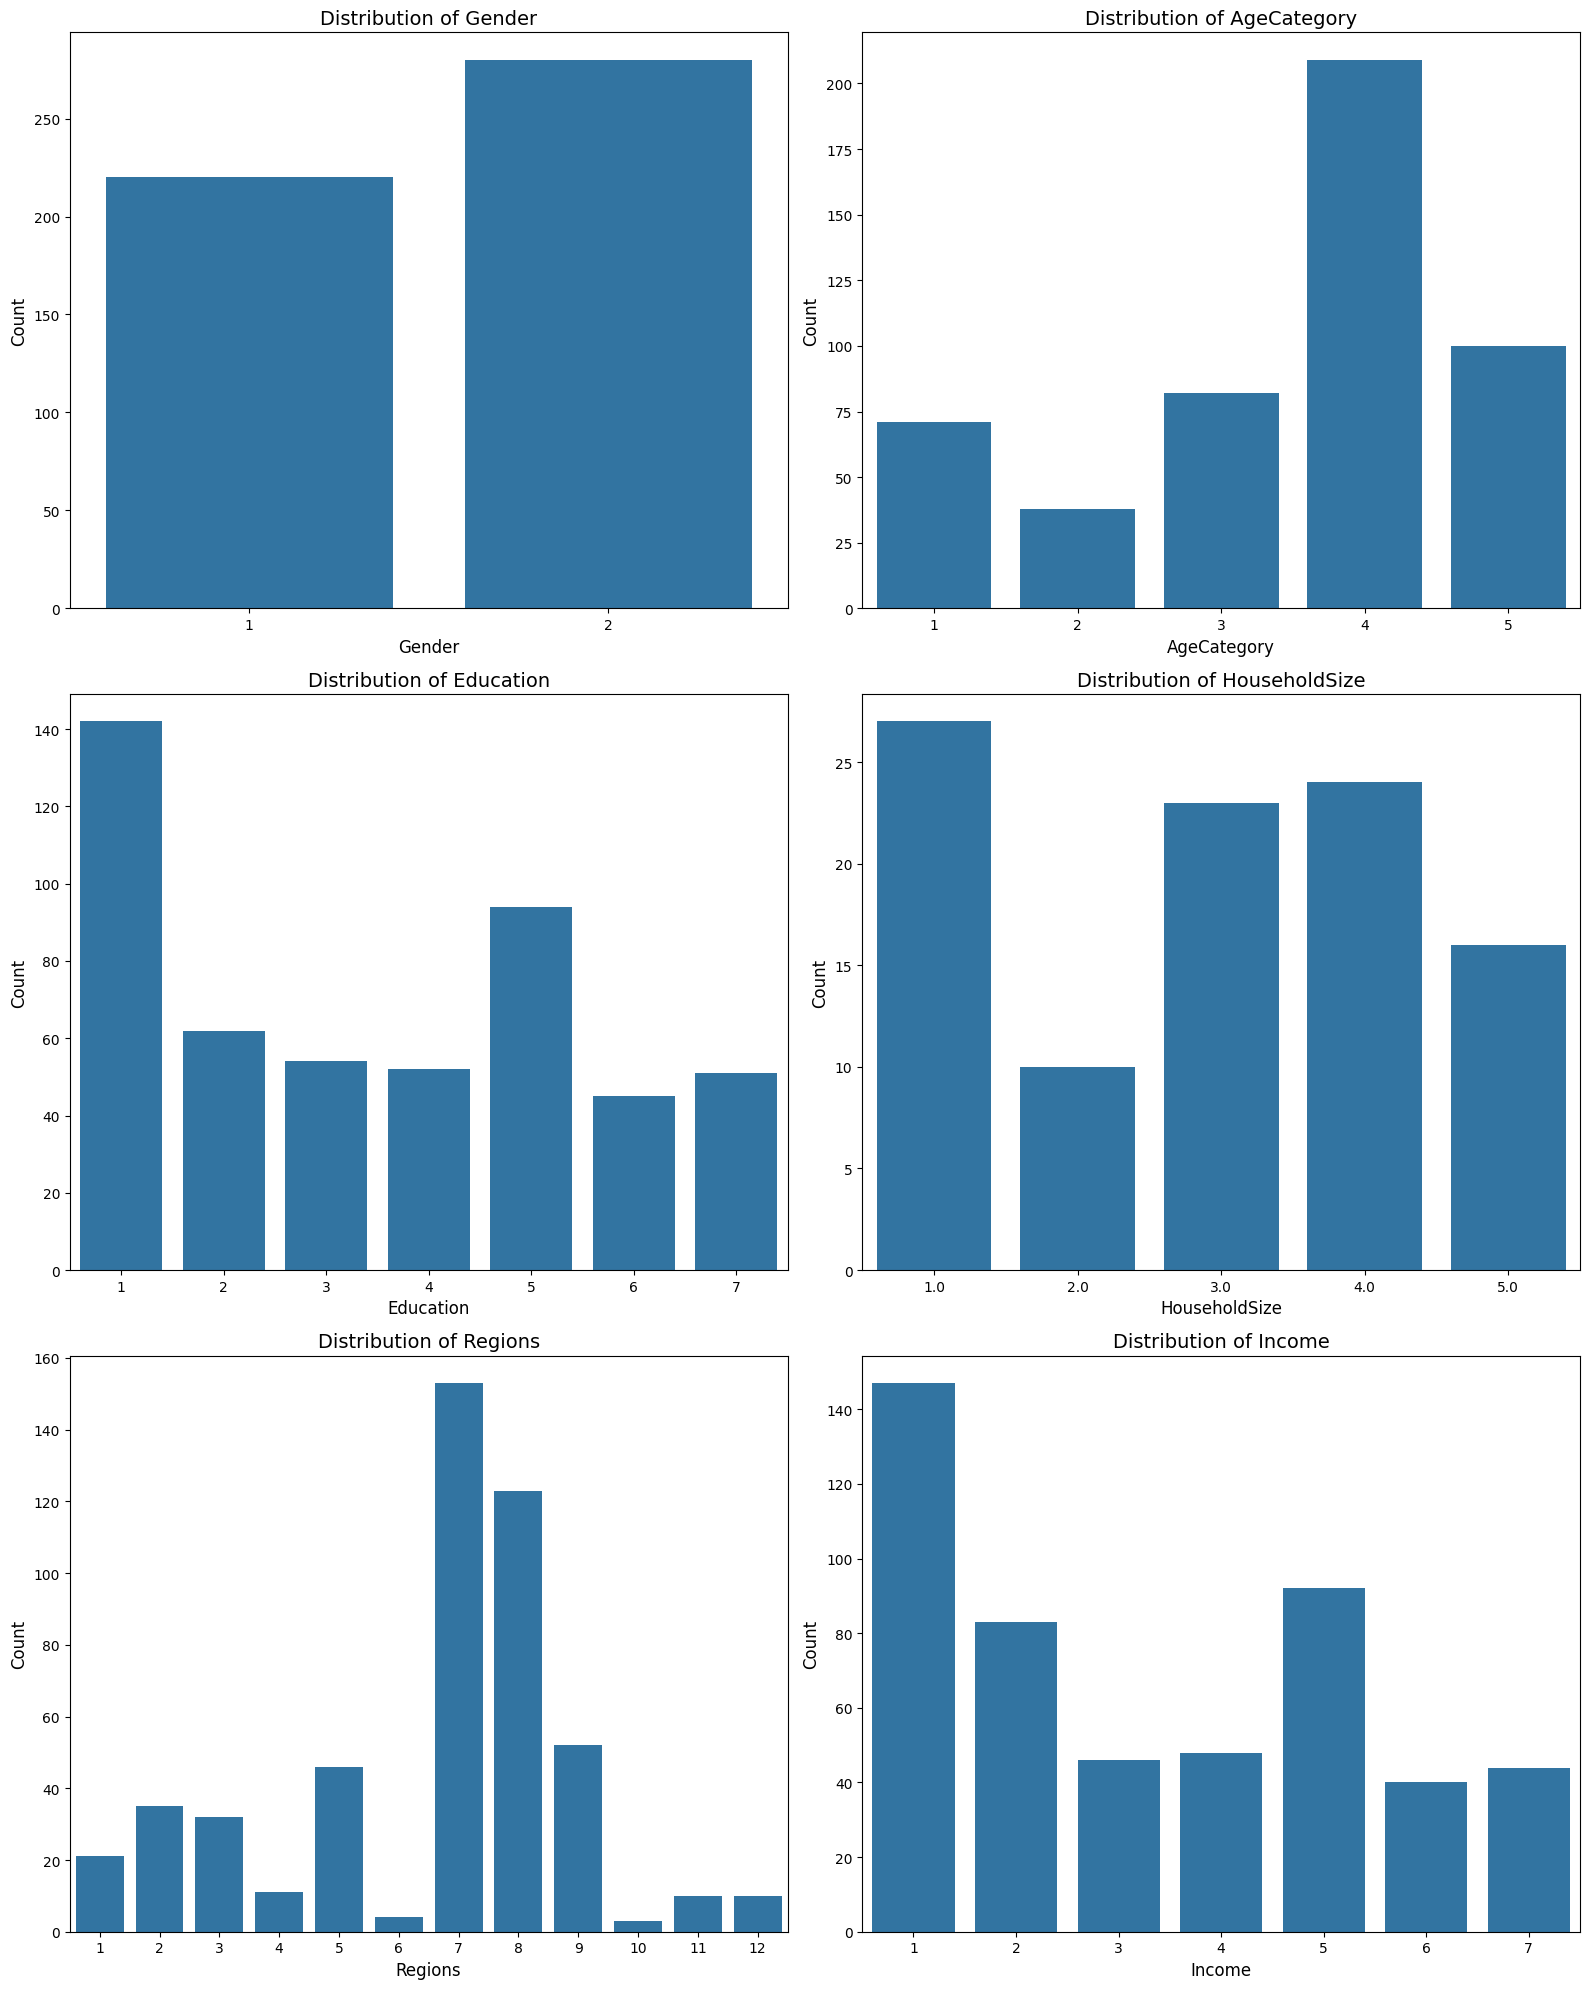

In [8]:
# Categorical Variables: Visualize

# Summary statistics and visualization for categorical variables
plt.figure(figsize = (16, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x = col, data = df)
    plt.title(f'Distribution of {col}', fontsize = 14)
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Count', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.show()

[2] Continuous Variables

In [9]:
# Create average ratings for each survey theme

df['Price_Sensitivity'] = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].mean(axis=1)
df['Environmental_Impact'] = df[['Q6', 'Q7', 'Q8', 'Q9', 'Q10']].mean(axis=1)
df['Service_Reliability'] = df[['Q11', 'Q12', 'Q13', 'Q14', 'Q15']].mean(axis=1)
df['Customer_Support'] = df[['Q16', 'Q17', 'Q18', 'Q19', 'Q20']].mean(axis=1)
df['Company_Reputation'] = df[['Q21', 'Q22', 'Q23', 'Q24', 'Q25']].mean(axis=1)

In [10]:
# Continuous variables: Summary Stat

df.describe()

,ID,Energy Bills,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q23,Q24,Q25,Con_Usage,Recommend,Price_Sensitivity,Environmental_Impact,Service_Reliability,Customer_Support,Company_Reputation
count,500.000000,100.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2851.930000,3.697000,3.446000,3.696000,3.224000,3.495000,3.260000,3.256000,3.372000,...,3.412000,3.412000,3.682000,3.545000,3.378000,3.511600,3.502200,3.553800,3.691600,3.445600
std,144.481833,1257.776548,1.083531,0.960692,0.966671,0.938929,0.887158,1.196773,1.281698,1.129233,...,0.976813,1.219931,0.940556,0.491893,0.677521,0.416428,0.501356,0.460597,0.446686,0.467716
min,1.000000,633.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,2.500000,0.500000,1.900000,2.000000,2.100000,2.300000,2.000000
25%,125.750000,1736.500000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.300000,3.175000,3.200000,3.400000,3.100000
50%,250.500000,3020.500000,4.000000,4.000000,4.000000,3.500000,3.500000,3.000000,3.500000,3.500000,...,3.500000,3.500000,4.000000,3.500000,3.500000,3.500000,3.500000,3.600000,3.700000,3.500000
75%,375.250000,3892.000000,4.500000,4.000000,4.500000,4.000000,4.000000,4.000000,4.500000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.800000,3.800000,3.900000,4.000000,3.800000
max,500.000000,4992.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.600000,4.900000,4.600000,4.800000,4.500000


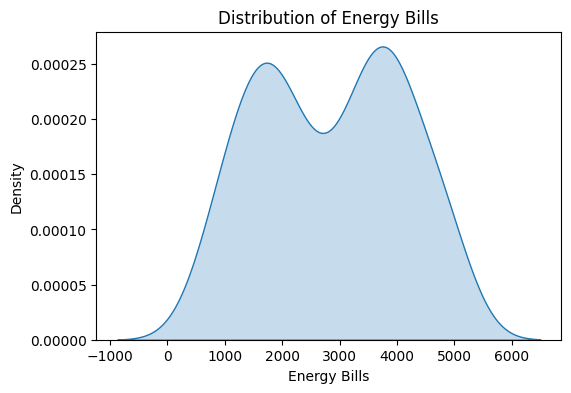

In [11]:
# Continuous variables: Visualize demographics

demo_con = ['Energy Bills']

for cont_var in demo_con:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[cont_var], shade=True)
    plt.title(f'Distribution of {cont_var}')
    plt.xlabel(cont_var)
    plt.ylabel('Density')
    plt.show()

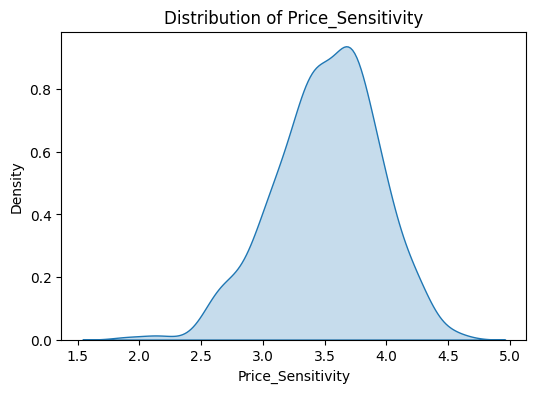

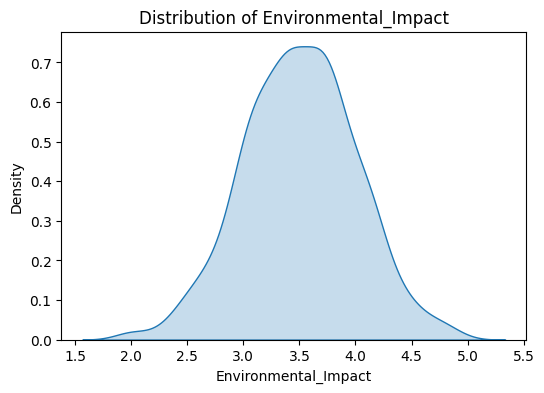

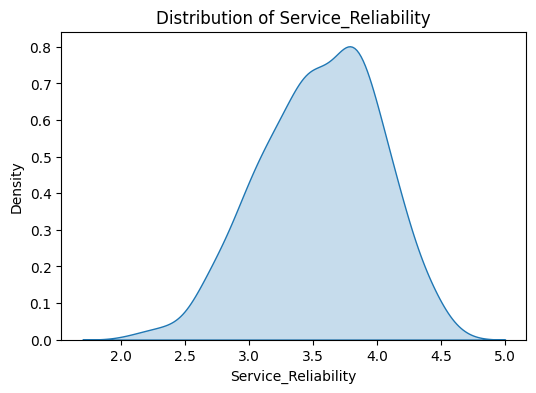

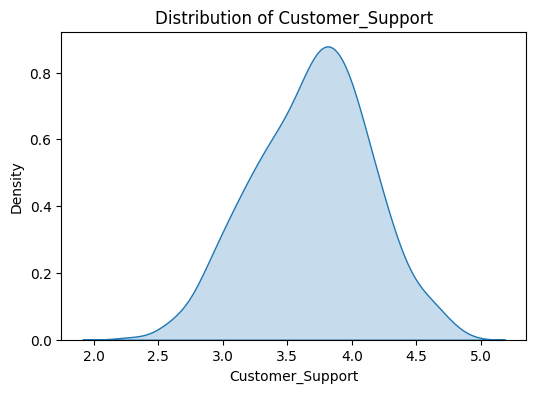

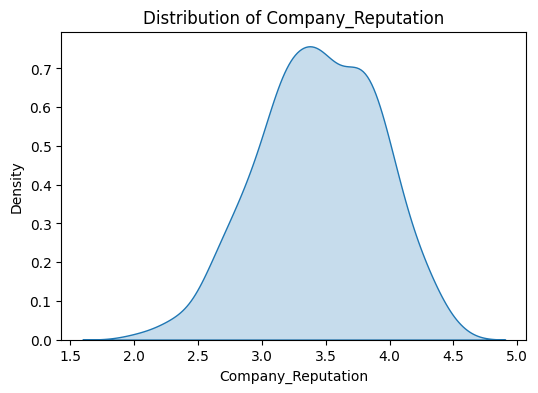

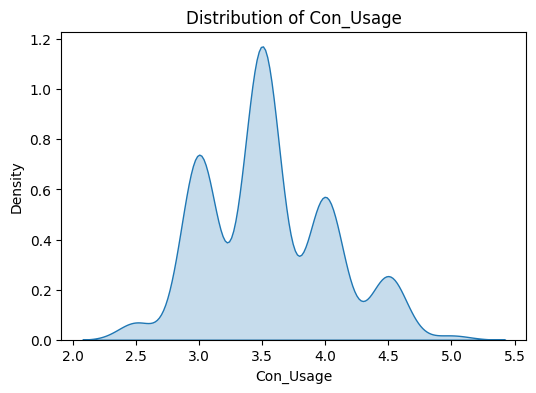

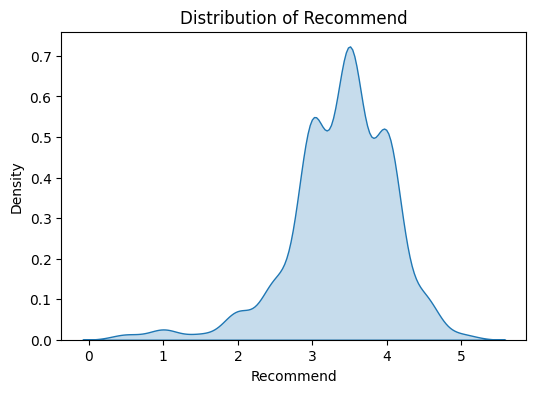

In [12]:
# Continuous variables: Visualize survey response

survey_theme = ['Price_Sensitivity',
                'Environmental_Impact',
                'Service_Reliability',
                'Customer_Support',
                'Company_Reputation',
                'Con_Usage',
                'Recommend']

for var in survey_theme:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[var], shade=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()

#### 2.4.2 Bivariate Analysis

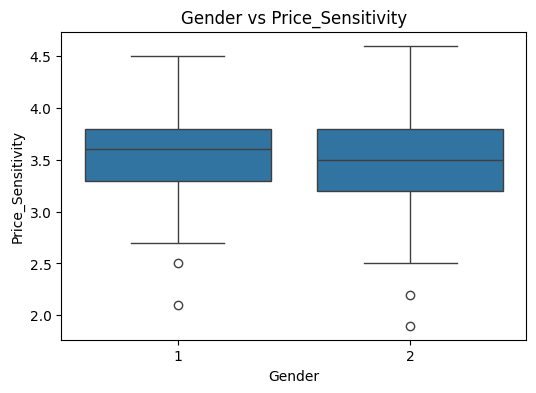

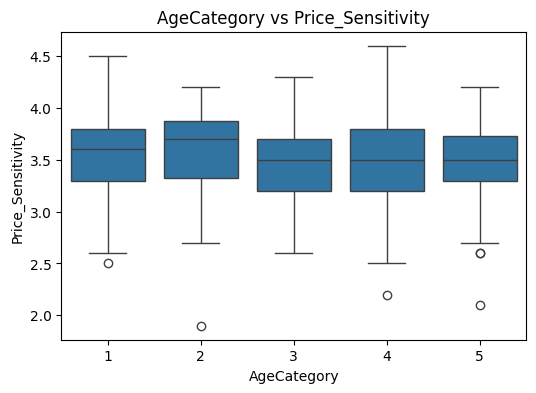

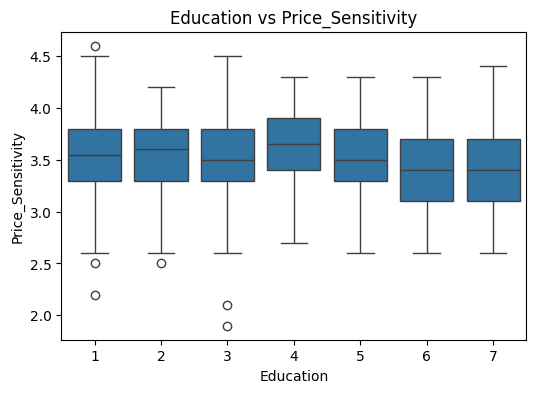

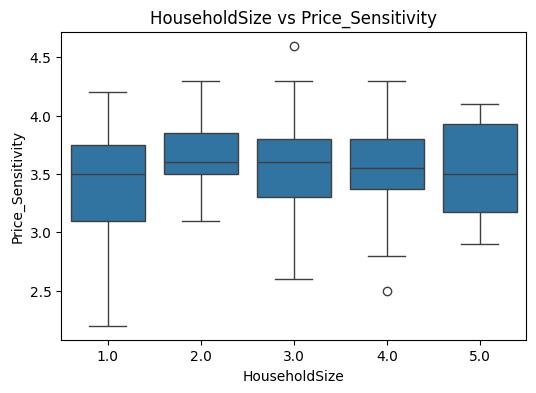

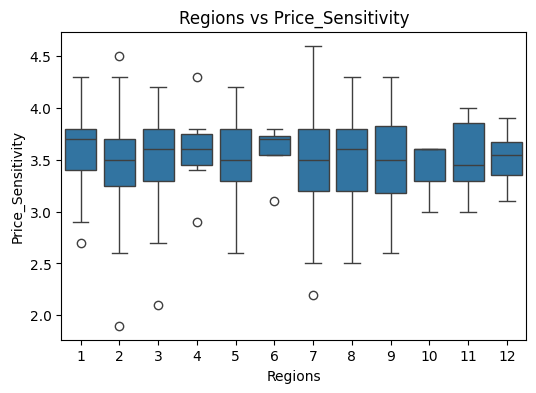

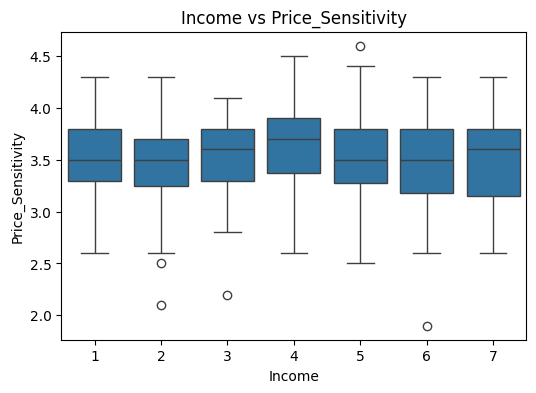

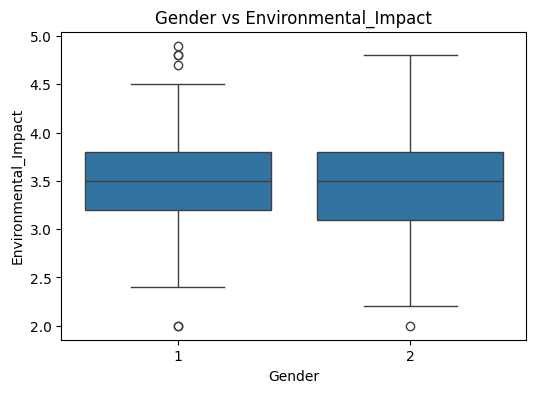

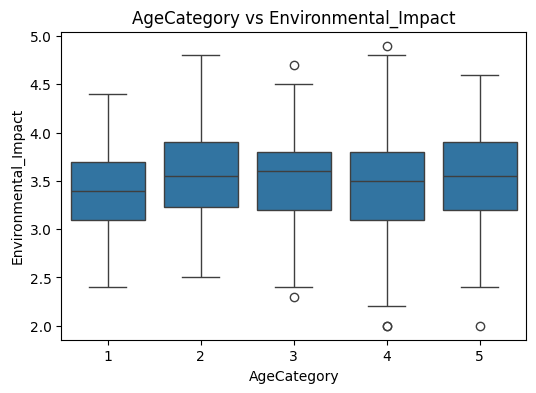

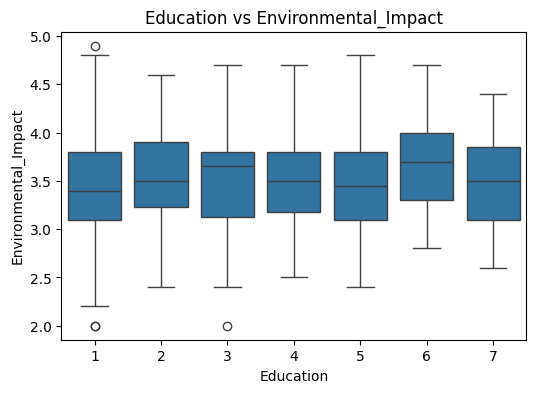

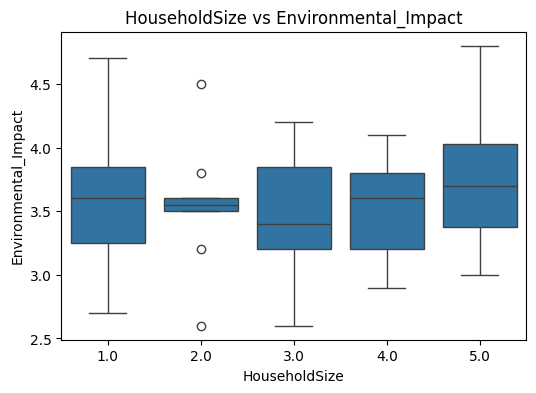

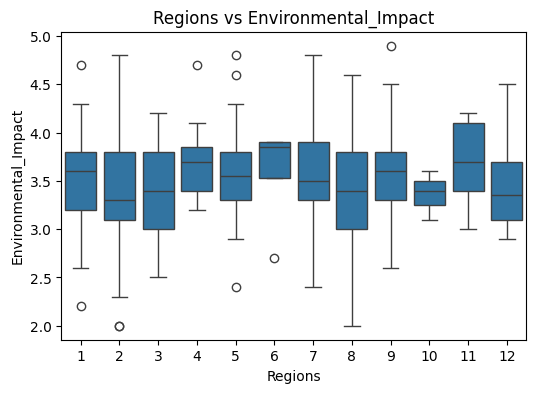

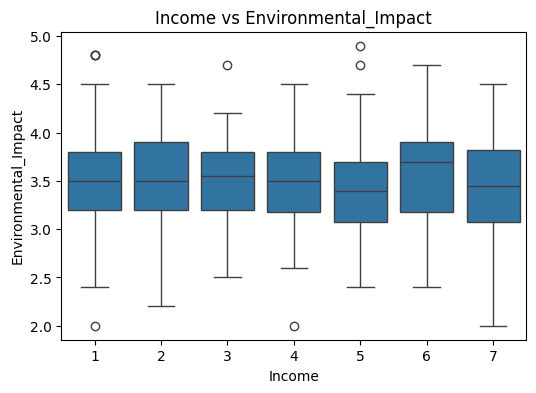

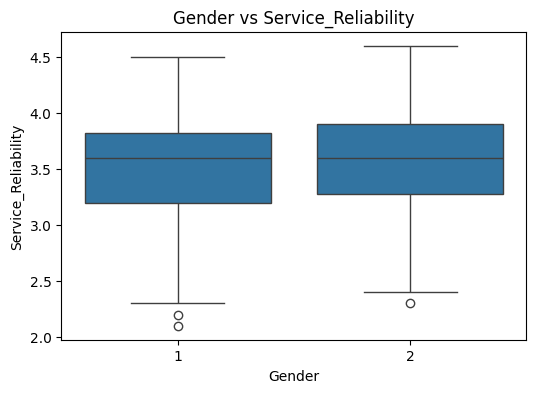

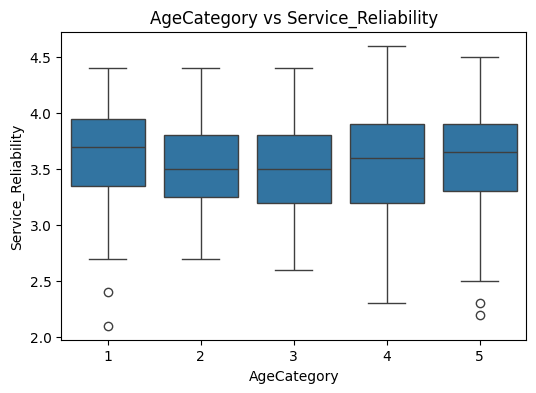

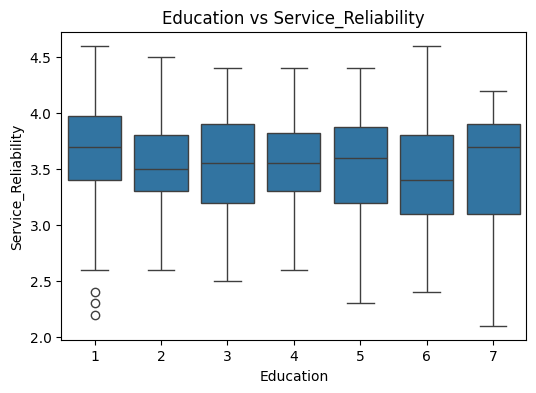

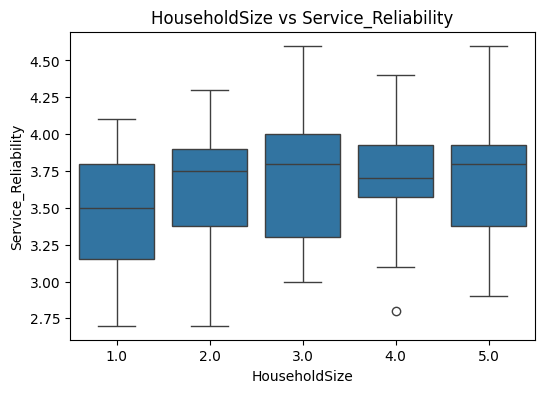

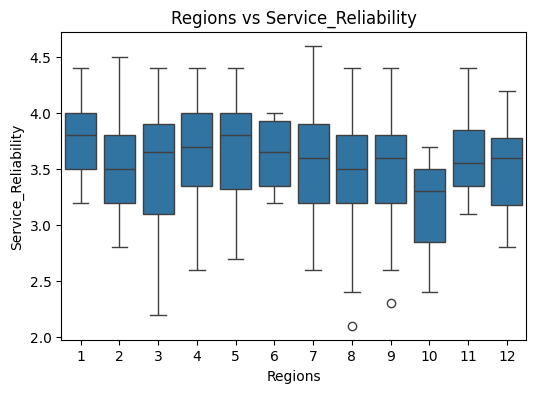

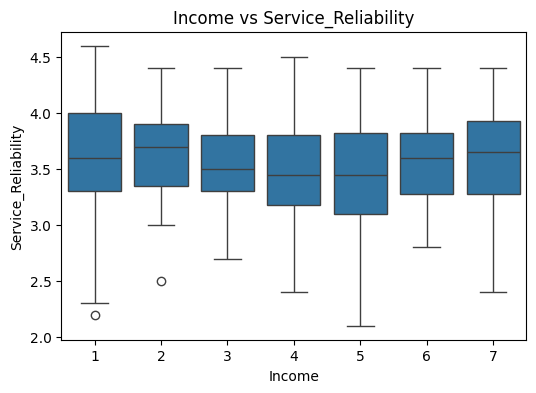

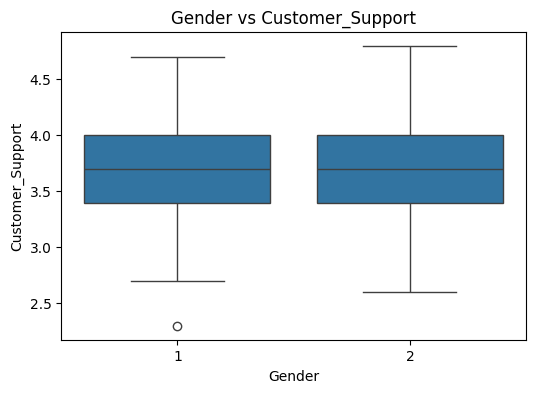

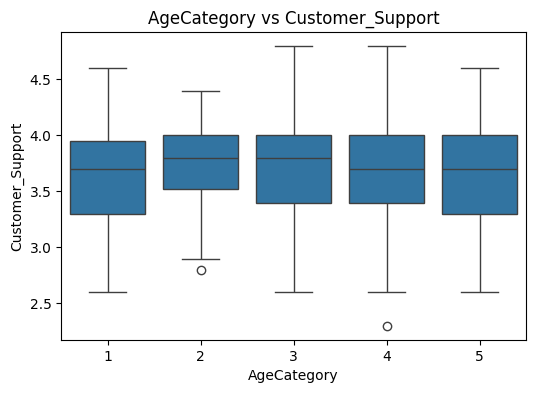

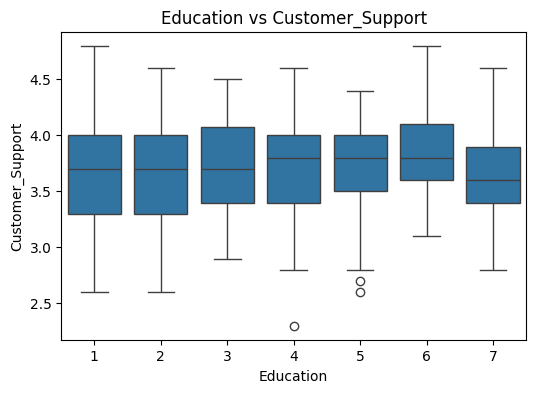

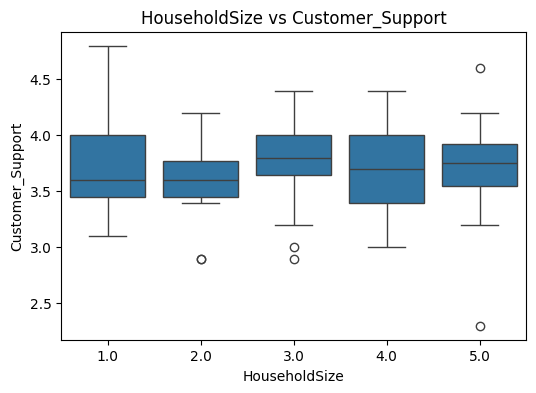

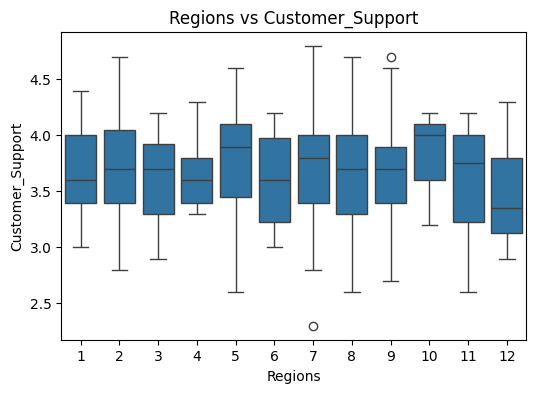

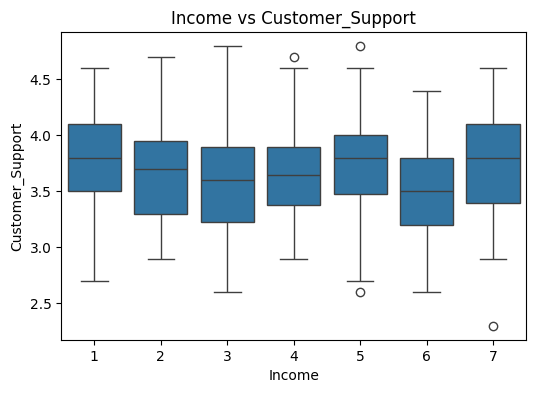

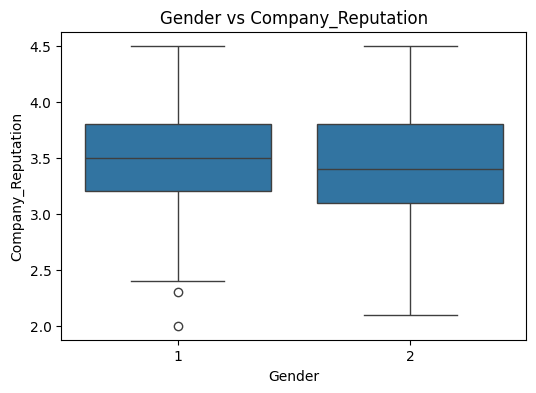

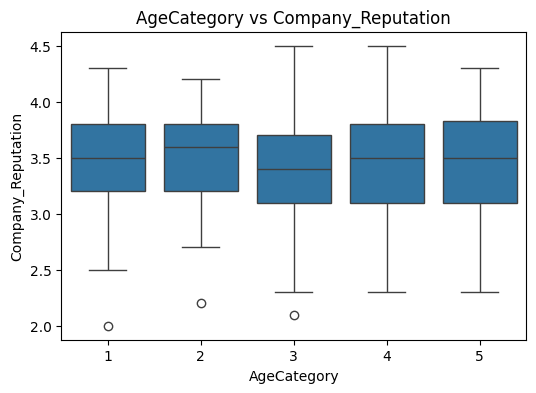

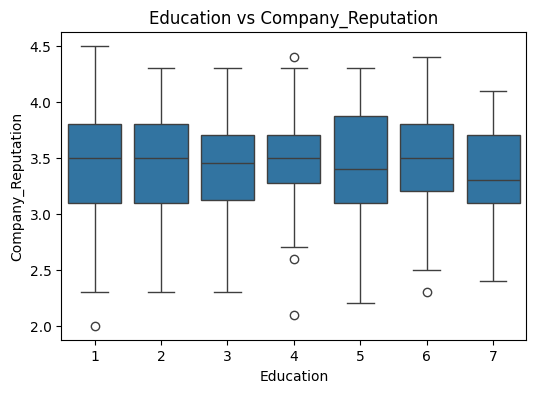

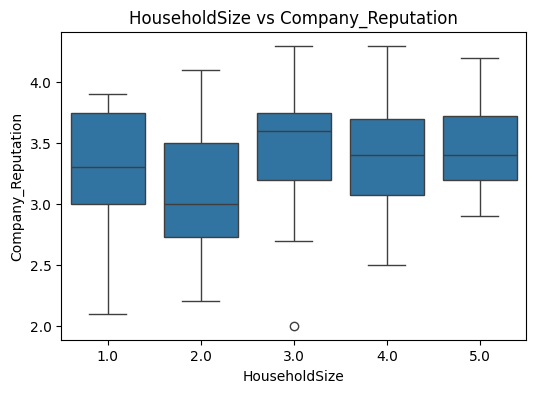

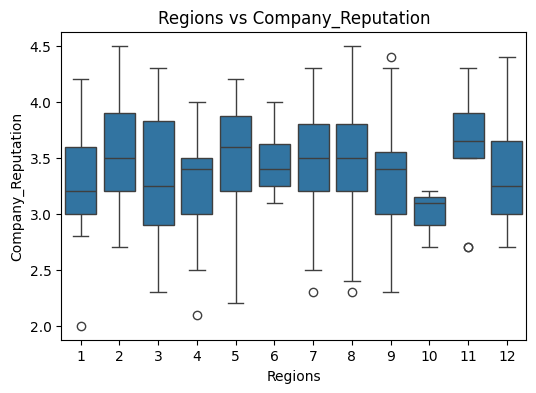

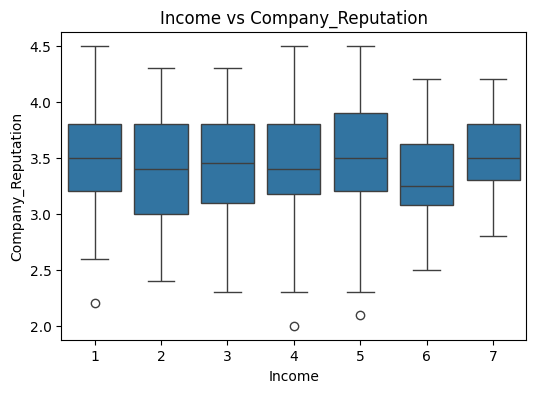

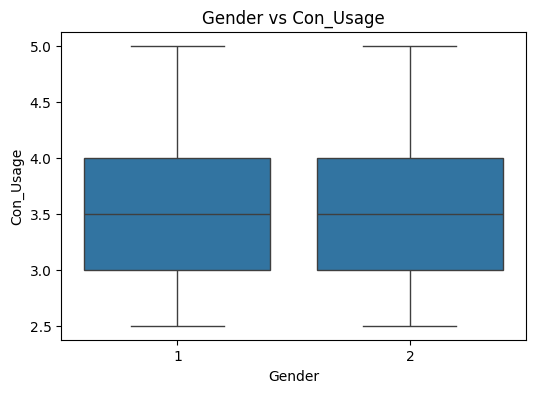

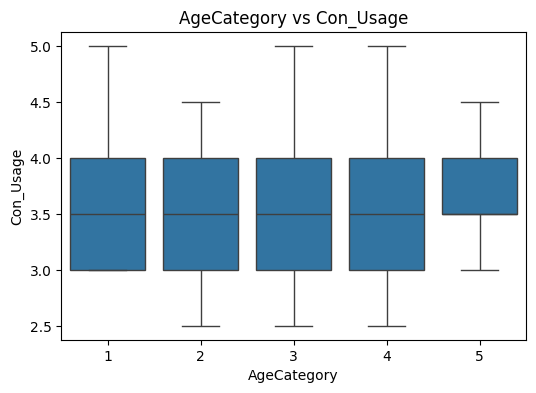

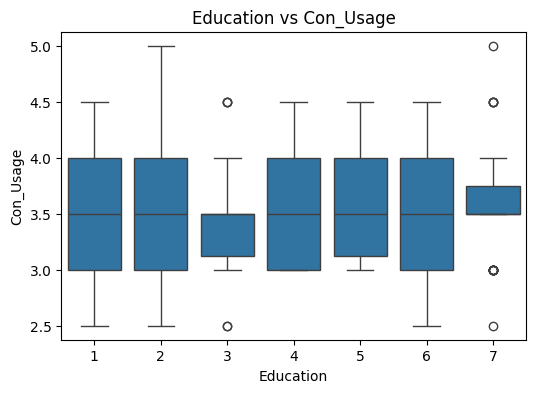

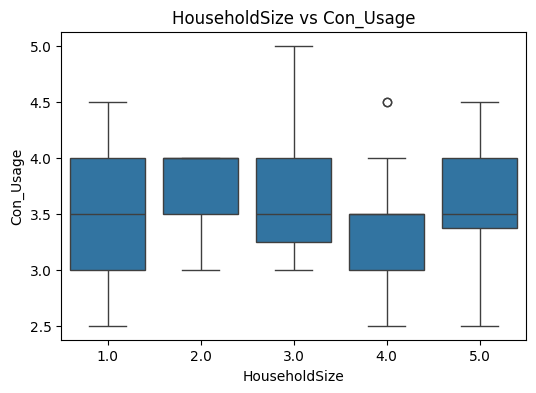

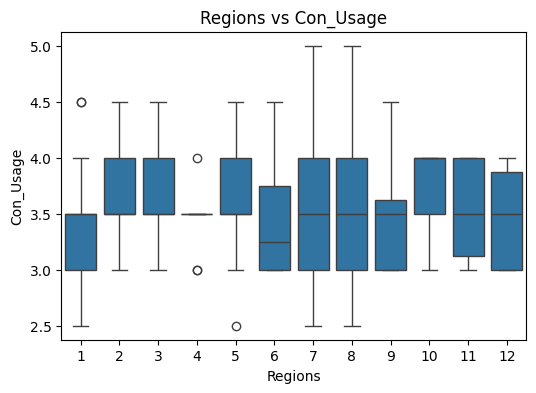

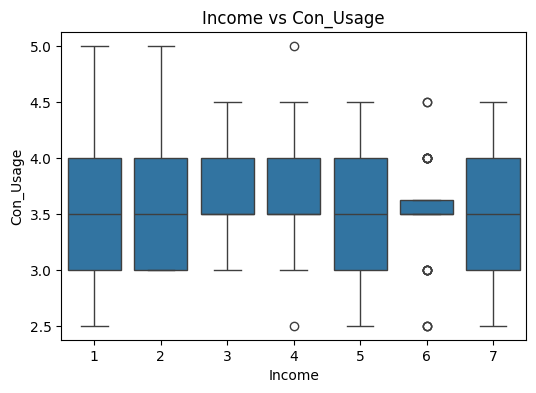

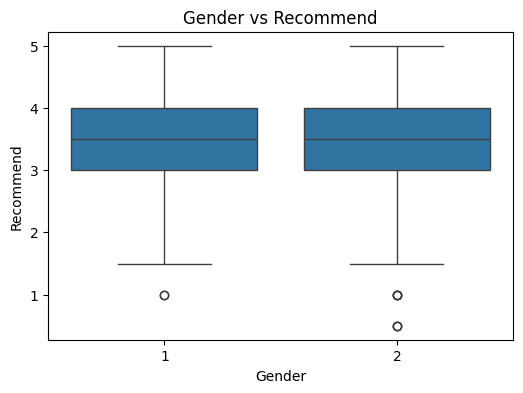

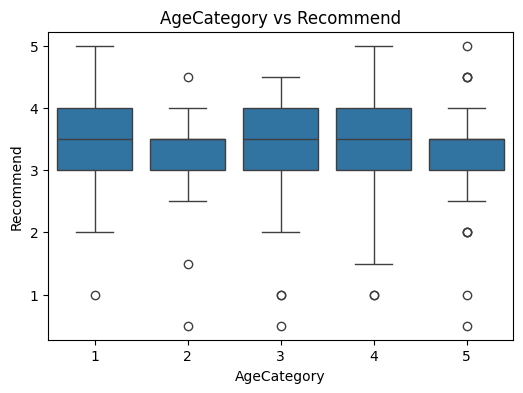

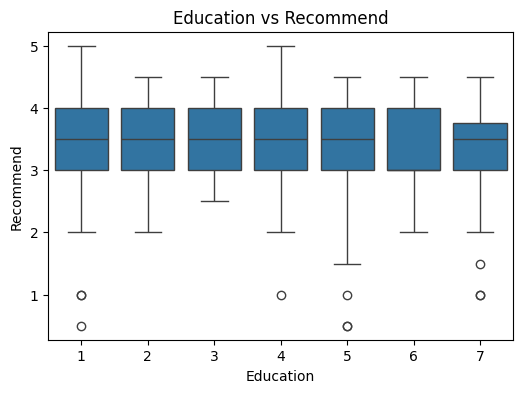

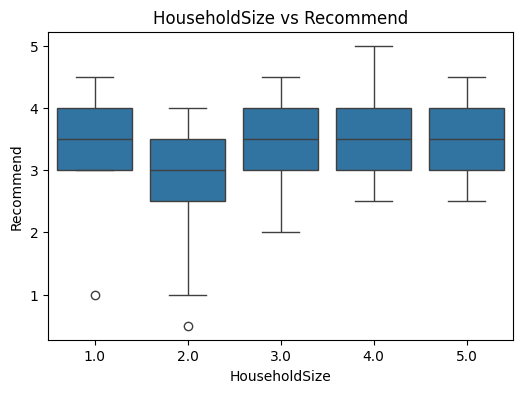

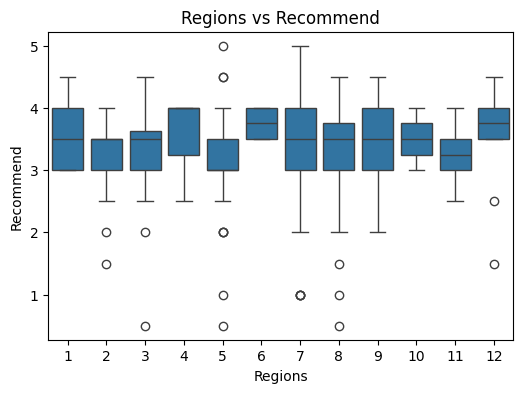

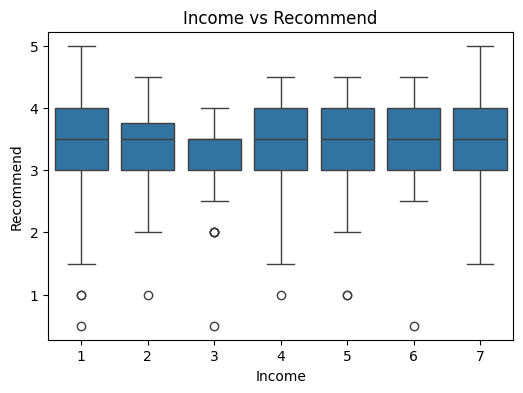

In [13]:
# Distribution of 'survey ratings' in each theme vs 'demographics'

demo_cat = ['Gender', 'AgeCategory', 'Education', 'HouseholdSize', 'Regions', 'Income']

for theme in survey_theme:
    for var in demo_cat:
        plt.figure(figsize = (6, 4))
        sns.boxplot(x = var, y = theme, data = df)
        plt.title(f'{var} vs {theme}')
        plt.xlabel(var)
        plt.ylabel(theme)
        plt.show()

## Step3: ANOVA, Tukey HSD & Assumption Tests

###3.1 Normality of Residuals Test:

The normality of residuals test checks if the residuals are normally distributed. This assumption is crucial for the validity of ANOVA results.

#### Hypotheses

- **Null Hypothesis (H0\)**: The residuals are **normally** distributed.


- **Alternative Hypothesis (H1)**: The residuals are **not normally** distributed.


#### Shapiro-Wilk Test

The Shapiro-Wilk test is used to assess the normality of residuals.

\
\begin{cases}
p > \alpha & \text{Fail to reject } H_0 \\
p < \alpha & \text{Reject } H_0
\end{cases}

\

###3.2 Homogeneity of Variances (Homoscedasticity):

- The variance within each of the groups being compared should be approximately equal.
- When this assumption is violated, the results of the statistical test may not be valid.

#### Hypotheses
- **Null Hypothesis (H0)**: The variances across different groups are equal.
  $$
  H_0: \sigma_1^2 = \sigma_2^2 = \cdots = \sigma_k^2
  $$

- **Alternative Hypothesis (H1)**: At least one group has a different variance.
  $$
  H_1: \text{At least one } \sigma_i^2 \neq \sigma_j^2
  $$

### Q: Customer Support vs Income

Is there a significant difference in 'customer support' among different income groups?
- Ans: Yes, we reject the null hypothesis, indicating a statistically significant difference in 'customer support' among different income groups.


In [55]:
# Perform ANOVA
model = ols('Customer_Support ~ C(Income)', data = df).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

# Check the p-value from the ANOVA table
p_val = anova_table["PR(>F)"][0]

# If ANOVA is significant, perform Tukey HSD test
if p_val < 0.05:
    print("ANOVA is significant, performing Tukey HSD test...")
    tukey = pairwise_tukeyhsd(endog=df['Customer_Support'],
                              groups=df['Income'], alpha = 0.05)
    print(tukey)
else:
    print("ANOVA is not significant, no need for further post-hoc tests.")

              sum_sq     df         F    PR(>F)
C(Income)   3.167775    6.0  2.700143  0.013728
Residual   96.396945  493.0       NaN       NaN
ANOVA is significant, performing Tukey HSD test...
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.111 0.5293 -0.2908  0.0687  False
     1      3  -0.1879 0.1561 -0.4091  0.0333  False
     1      4  -0.1232 0.6324 -0.3408  0.0944  False
     1      5   -0.089 0.7366  -0.263  0.0851  False
     1      6  -0.2807 0.0074 -0.5142 -0.0473   True
     1      7   -0.088 0.9094  -0.313   0.137  False
     2      3  -0.0769 0.9648 -0.3175  0.1638  False
     2      4  -0.0122    1.0 -0.2496  0.2252  False
     2      5    0.022 0.9999 -0.1761  0.2202  False
     2      6  -0.1697 0.4199 -0.4217  0.0823  False
     2      7    0.023    1.0 -0.2211  0.2672  False
     3      4   0.0647 0.9921 -0.2054  0.3348  False
     3    

Shapiro-Wilk Test: ShapiroResult(statistic=0.9899201393127441, pvalue=0.0016664359718561172)


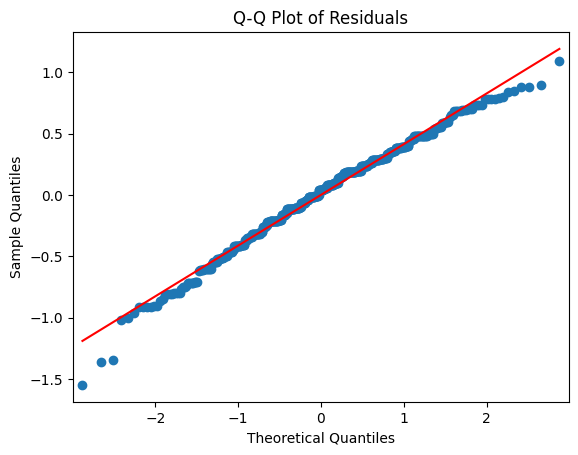

In [29]:
# 1. Normality Check

model = ols('Price_Sensitivity ~ C(Income)', data = df).fit()
residuals = model.resid

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk Test:', shapiro_test)

# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

Levene's Test: LeveneResult(statistic=0.6603682636036944, pvalue=0.6817716722399585)


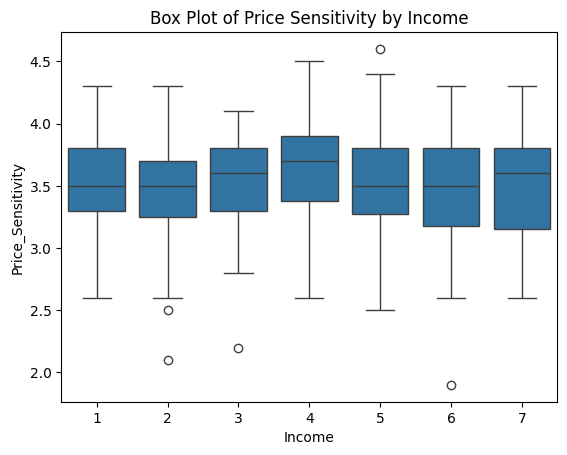

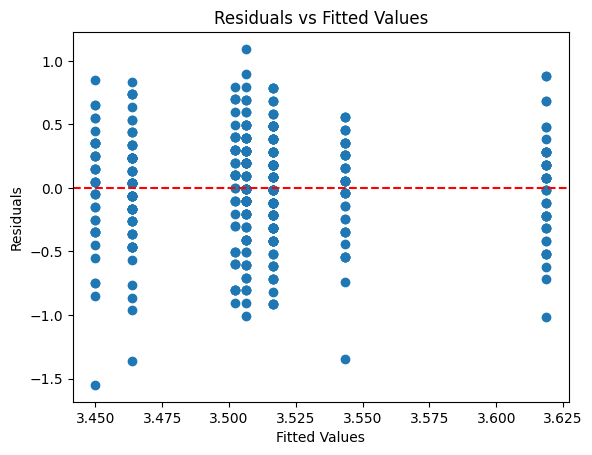

In [30]:
# 2. Homogeneity of Variance Check

# Levene's Test
levene_test = stats.levene(*[df[df['Income'] == group]['Price_Sensitivity'] for group in df['Income'].unique()])
print('Levene\'s Test:', levene_test)

# Box Plot
sns.boxplot(x = 'Income', y = 'Price_Sensitivity', data = df)
plt.title('Box Plot of Price Sensitivity by Income')
plt.show()

# Residuals vs Fitted Plot
fitted_vals = model.fittedvalues
plt.scatter(fitted_vals, residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### Q: Environmental Impact vs Education

Is there a significant difference in concerns on 'environmental impact' among different education level?
- Ans: No, we don not reject the null hypothesis, indicating there is no statistically significant difference in 'environmental impact' among different education level.

In [60]:
# Perform ANOVA
model = ols('Environmental_Impact ~ C(Education)', data = df).fit()
anova_table = anova_lm(model, typ = 2)
print(anova_table)

# Check the p-value from the ANOVA table
p_val = anova_table["PR(>F)"][0]

# If ANOVA is significant, perform Tukey HSD test
if p_val < 0.05:
    print("ANOVA is significant, performing Tukey HSD test...")
    tukey = pairwise_tukeyhsd(endog=df['Environmental_Impact'],
                              groups=df['Education'], alpha = 0.05)
    print(tukey)
else:
    print("ANOVA is not significant, no need for further post-hoc tests.")

                  sum_sq     df         F    PR(>F)
C(Education)    1.439591    6.0  0.954015  0.455961
Residual      123.987989  493.0       NaN       NaN
ANOVA is not significant, no need for further post-hoc tests.


## T-Test (2 Groups)

### Q: Is there a difference in the rating on 'price sensitivity' vs 'company reputation'?

- Ans: Reject H0: there is a statistically significant difference between the ratings on 'price sensitivity' and 'company reputation'.


Shapiro-Wilk Test for Differences: ShapiroResult(statistic=0.9962542653083801, pvalue=0.2892381250858307)


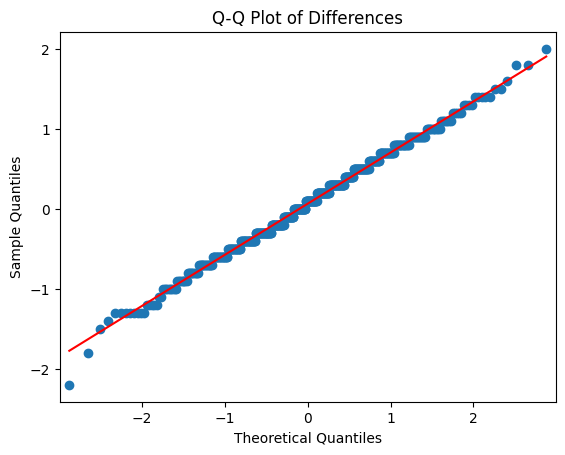

In [58]:
# Assumption Check

# Calculate the differences
differences = df['Price_Sensitivity'] - df['Company_Reputation']

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(differences)
print('Shapiro-Wilk Test for Differences:', shapiro_test)

# Q-Q Plot for the differences
sm.qqplot(differences, line='s')
plt.title('Q-Q Plot of Differences')
plt.show()

In [59]:
# T-Test (mean difference in 2 groups)

t_test_result = stats.ttest_rel(df['Price_Sensitivity'], df['Company_Reputation'])
print('Paired t-test Result:', t_test_result)

Paired t-test Result: TtestResult(statistic=2.3080260710887908, pvalue=0.021405779689576167, df=499)
